**Context**

The growth of supermarkets in most populated cities are increasing and market competitions are also high. The dataset is one of the historical sales of supermarket company which has recorded in 3 different branches for 3 months data.

**Data Dictionary**

1. ***Invoice id:*** Computer generated sales slip invoice identification number

2. ***Branch:*** Branch of supercenter (3 branches are available identified by A, B and C).

3. ***City:*** Location of supercenters

4. ***Customer type:*** Type of customers, recorded by Members for customers using member card and Normal for without member card.

5. ***Gender:*** Gender type of customer

6. ***Product line:*** General item categorization groups - Electronic accessories, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel

7. ***Unit price:*** Price of each product in USD

8. ***Quantity:*** Number of products purchased by customer

9. ***Tax:*** 5% tax fee for customer buying

10. ***Total:*** Total price including tax

11. ***Date:*** Date of purchase (Record available from January 2019 to March 2019)

12. ***Time:*** Purchase time (10am to 9pm)

13. ***Payment:*** Payment used by customer for purchase (3 methods are available \u2013 Cash, Credit card and Ewallet)

14. ***COGS:*** Cost of goods sold

15. ***Gross margin percentage:*** Gross margin percentage

16. ***Gross income:*** Gross income

17. ***Rating:*** Customer stratification rating on their overall shopping experience (On a scale of 1 to 10)

## Data Exploration

In [3]:
# load necessary package

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calmap
from pandas_profiling import ProfileReport

In [6]:
# load the data

df = pd.read_csv("supermarket_sales.csv")
df.head()

Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total     Date  \
0       Health and beauty       74.69       7.0  26.1415  548.9715   1/5/19   
1  Electronic accessories       15.28       5.0   3.8200   80.2200   3/8/19   
2      Home and lifestyle       46.33       7.0  16.2155  340.5255   3/3/19   
3       Health and beauty       58.22       8.0  23.2880  489.0480  1/27/19   
4       Sports and travel       86.31       7.0  30.2085  634.3785   2/8/19   

    Time      Payment    cogs  gross margin percentage  gross income  Rating  
0  13:08      Ewallet  522.83                 4.761905       26.1415     9.1  
1  10:29         Cash   76.40                 4.761905        3.8200     9.6  
2  13:23  Credit card  324.31                 4.761905       16.2155     7.4  
3  20:33      Ewallet  465.76                 4.761905       23.2880     8.4  
4  10:37      Ewallet  604.17                 4.761905       30.2085     5.3

In [7]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [8]:
df.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                   float64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

In [10]:
# change the data type of Column Date
df['Date'] = pd.to_datetime(df['Date'])

# set the Date Column as index
df.set_index('Date', inplace = True)

In [11]:
df.describe()

Unit price    Quantity       Tax 5%        Total         cogs  \
count  996.000000  983.000000  1003.000000  1003.000000  1003.000000   
mean    55.764568    5.501526    15.400368   323.407726   308.007358   
std     26.510165    2.924673    11.715192   246.019028   234.303836   
min     10.080000    1.000000     0.508500    10.678500    10.170000   
25%     33.125000    3.000000     5.894750   123.789750   117.895000   
50%     55.420000    5.000000    12.096000   254.016000   241.920000   
75%     78.085000    8.000000    22.539500   473.329500   450.790000   
max     99.960000   10.000000    49.650000  1042.650000   993.000000   

       gross margin percentage  gross income       Rating  
count             1.003000e+03   1003.000000  1003.000000  
mean              4.761905e+00     15.400368     6.972682  
std               6.220351e-14     11.715192     1.717647  
min               4.761905e+00      0.508500     4.000000  
25%               4.761905e+00      5.894750     5.500000  
50%               4.761905e+00     12.096000     7.000000  
75%               4.761905e+00     22.539500     8.500000  
max               4.761905e+00     49.650000    10.000000

## Univariate Analysis

### numerical feature

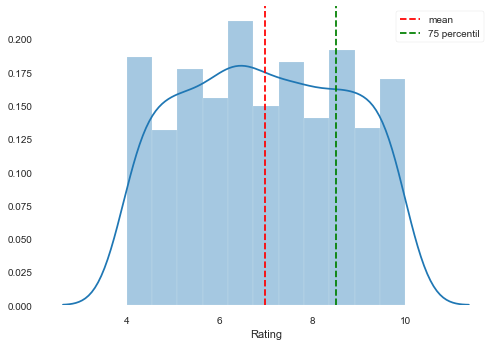

In [15]:
sns.distplot(df['Rating'])
plt.axvline(x = np.mean(df['Rating']), c = 'red', ls = '--', label = 'mean')
plt.axvline(x = np.percentile(df['Rating'], 75), c = 'green', ls = '--', label = '75 percentil')
plt.legend()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fca400fe7d0>,
      dtype=object)

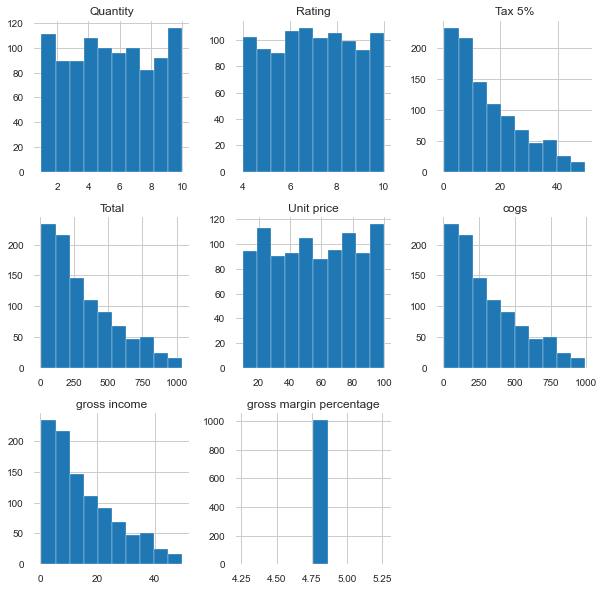

In [16]:
df.hist(figsize = (10,10))

### Categorical feature

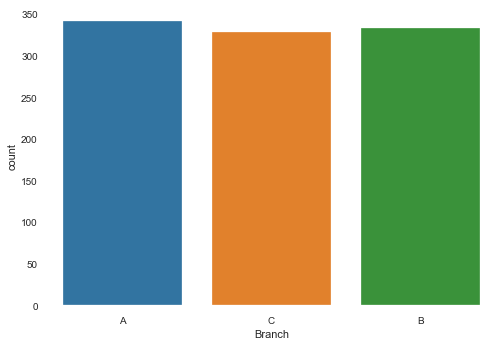

In [17]:
sns.countplot(df['Branch'])

In [19]:
df['Branch'].value_counts()

A    342
B    333
C    328
Name: Branch, dtype: int64

## Bivariate Analysis

### Between two numerical features

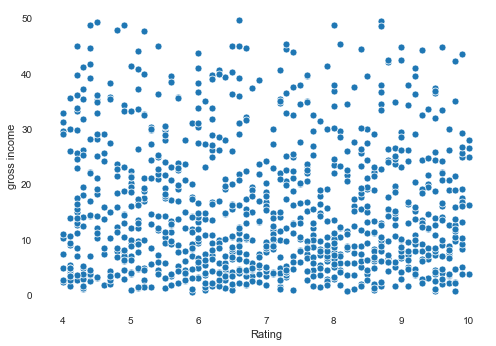

In [20]:
sns.scatterplot(df['Rating'], df['gross income'])

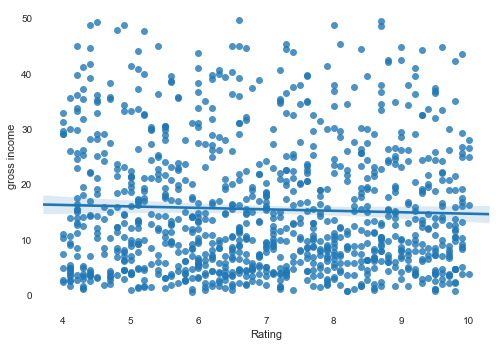

In [21]:
sns.regplot(df['Rating'], df['gross income'])

 ### Between numerical and categorical features

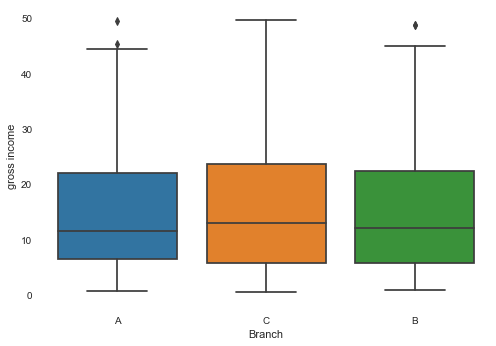

In [22]:
sns.boxplot(x = df['Branch'], y = df['gross income'])

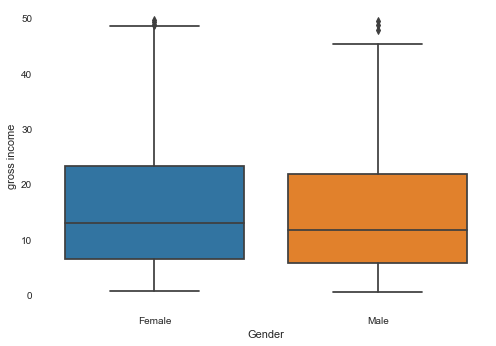

In [23]:
sns.boxplot(x = df['Gender'], y = df['gross income'])

### Trend data

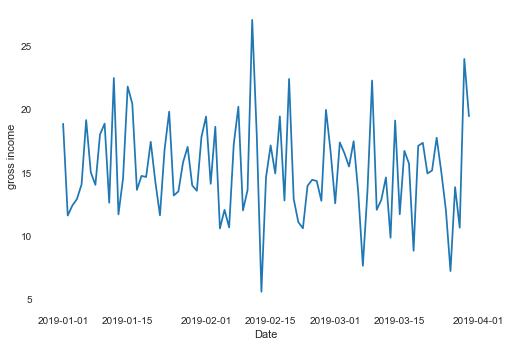

In [24]:
sns.lineplot(x = df.groupby(df.index).mean().index,
             y = df.groupby(df.index).mean()['gross income'])

/Users/jingnanbi/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/jingnanbi/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/Users/jingnanbi/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/jingnanbi/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


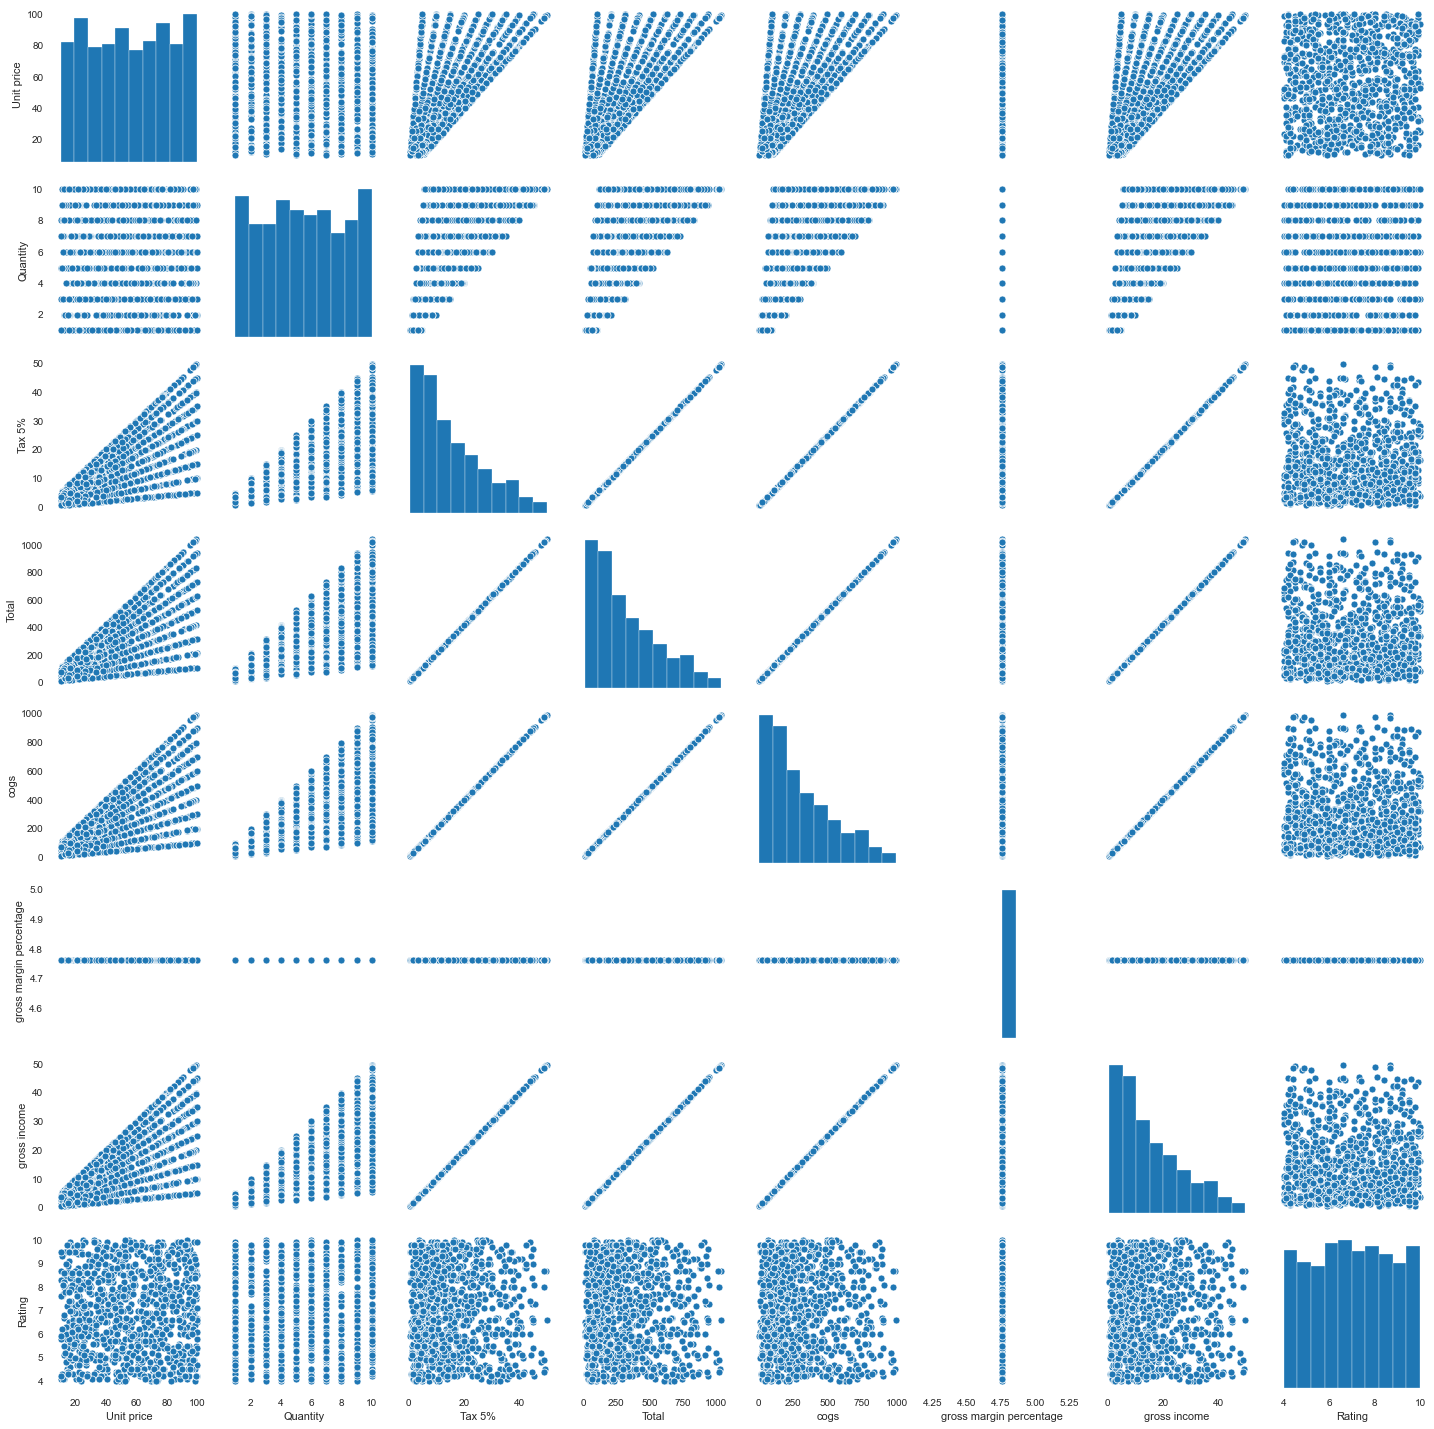

In [25]:
sns.pairplot(df)

## Duplicates removal and missing values

### Duplicates

In [26]:
df.duplicated().sum()

3

In [27]:
df[df.duplicated() == True]

Invoice ID Branch      City Customer type  Gender  \
Date                                                             
2019-02-18  849-09-3807      A    Yangon        Member  Female   
2019-03-10  745-74-0715      A    Yangon        Normal    Male   
2019-01-26  452-04-8808      B  Mandalay        Normal    Male   

                      Product line  Unit price  Quantity  Tax 5%    Total  \
Date                                                                        
2019-02-18     Fashion accessories       88.34       7.0  30.919  649.299   
2019-03-10  Electronic accessories         NaN       2.0   5.803  121.863   
2019-01-26  Electronic accessories       87.08       NaN  30.478  640.038   

             Time  Payment    cogs  gross margin percentage  gross income  \
Date                                                                        
2019-02-18  13:28     Cash  618.38                 4.761905        30.919   
2019-03-10  20:46  Ewallet  116.06                 4.761905         5.803   
2019-01-26  15:17     Cash  609.56                 4.761905        30.478   

            Rating  
Date                
2019-02-18     6.6  
2019-03-10     8.8  
2019-01-26     5.5

In [28]:
 df.drop_duplicates(inplace = True)

In [29]:
df.duplicated().sum()

0

### Missing values

In [30]:
df.isna().sum()

Invoice ID                  0
Branch                      0
City                        0
Customer type              79
Gender                      0
Product line               43
Unit price                  6
Quantity                   19
Tax 5%                      0
Total                       0
Time                        0
Payment                     0
cogs                        0
gross margin percentage     0
gross income                0
Rating                      0
dtype: int64

In [31]:
df.isna().sum()/len(df)

Invoice ID                 0.000
Branch                     0.000
City                       0.000
Customer type              0.079
Gender                     0.000
Product line               0.043
Unit price                 0.006
Quantity                   0.019
Tax 5%                     0.000
Total                      0.000
Time                       0.000
Payment                    0.000
cogs                       0.000
gross margin percentage    0.000
gross income               0.000
Rating                     0.000
dtype: float64

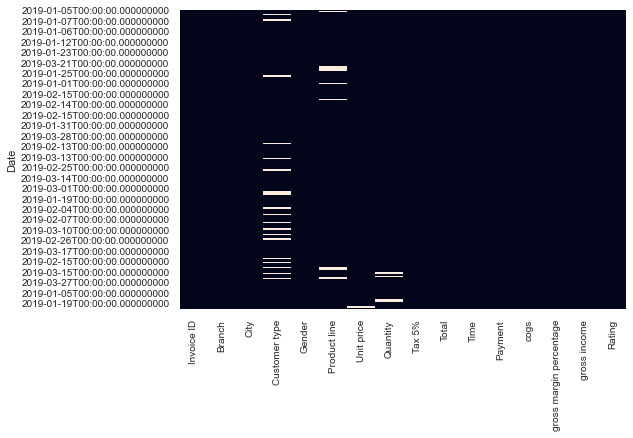

In [32]:
sns.heatmap(df.isnull(), cbar = False)

In [33]:
df.fillna(df.mean(), inplace = True)
df.fillna(df.mode().iloc[0], inplace = True)

## Use pandas_profiling to organize EDA

In [34]:
dataset = pd.read_csv('supermarket_sales.csv')
prof = ProfileReport(dataset)
prof

## Correlation analysis

In [35]:
round(np.corrcoef(df['gross income'], df['Rating'])[1][0], 2)

-0.04

In [36]:
np.round(df.corr(),2)

Unit price  Quantity  Tax 5%  Total  cogs  \
Unit price                     1.00      0.01    0.63   0.63  0.63   
Quantity                       0.01      1.00    0.70   0.70  0.70   
Tax 5%                         0.63      0.70    1.00   1.00  1.00   
Total                          0.63      0.70    1.00   1.00  1.00   
cogs                           0.63      0.70    1.00   1.00  1.00   
gross margin percentage       -0.00     -0.00    0.00   0.00  0.00   
gross income                   0.63      0.70    1.00   1.00  1.00   
Rating                        -0.01     -0.02   -0.04  -0.04 -0.04   

                         gross margin percentage  gross income  Rating  
Unit price                                  -0.0          0.63   -0.01  
Quantity                                    -0.0          0.70   -0.02  
Tax 5%                                       0.0          1.00   -0.04  
Total                                        0.0          1.00   -0.04  
cogs                                         0.0          1.00   -0.04  
gross margin percentage                      1.0          0.00    0.00  
gross income                                 0.0          1.00   -0.04  
Rating                                       0.0         -0.04    1.00

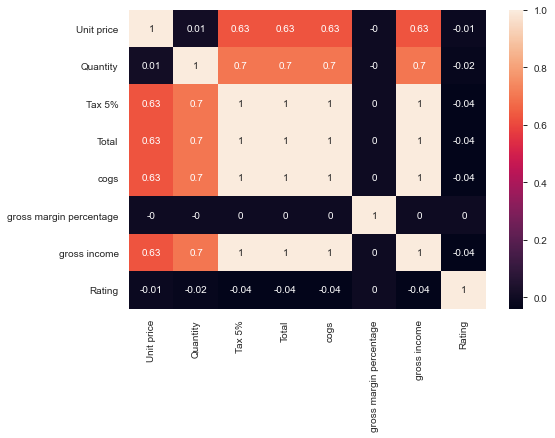

In [37]:
sns.heatmap(np.round(df.corr(),2), annot = True)